In [2]:
import json
import pandas

In [29]:
with open('tsData.json', 'r') as f:
    js = json.load(f)['feeds']

temp=  []
volt = []
rawTDS = []
stdTDS = []

for i in js:
    temp.append(i['temp'])
    volt.append(i['volt'])
    rawTDS.append(i['rawTds'])
    stdTDS.append(i['stdTds'])


temp=  np.array(temp).astype('float')
volt = np.array(volt).astype('float')
rawTDS = np.array(rawTDS).astype('float')
stdTDS = np.array(stdTDS).astype('float')

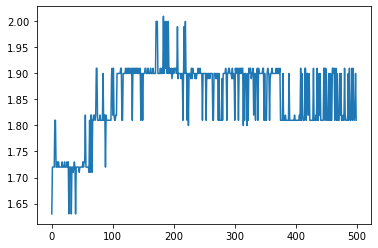

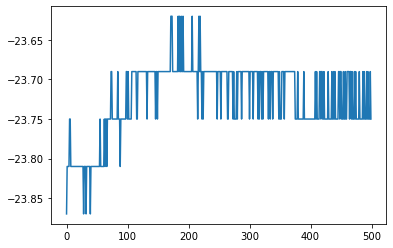

-23.87
0.25
1.6299999999999955


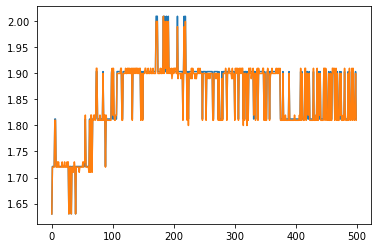

In [58]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(stdTDS).astype('float') - np.array(rawTDS).astype('float'))
plt.show()
t2 = temp.copy()
plt.plot(-t2)
plt.show()

t2 *= -1
print(np.min(t2))
t2 -= np.min(t2)
print(np.max(t2) -np.min(t2))
t2 *= (np.max(stdTDS - rawTDS) - np.min(stdTDS - rawTDS)) / np.max(t2) - np.min(t2)
print(np.min(stdTDS - rawTDS))
t2 += np.min(stdTDS - rawTDS)
plt.plot(t2)
plt.plot(np.array(stdTDS).astype('float') - np.array(rawTDS).astype('float'))
plt.show()


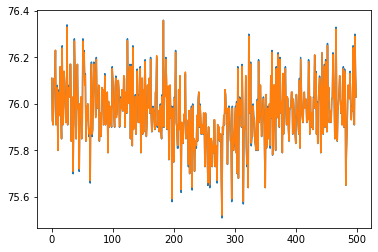

In [100]:
plt.plot(stdTDS)
plt.plot(rawTDS + (-temp + 23.87)*1.51 +  1.63 )

## Analysis: 
The corrected value of the TDS sensor is obtained as follows:

given: 
    - rawTDS: TDS value wothout corrections
    - temp: temperature reading
    - stdTDS: TDS value after correction

stdTDS = (rawTDS + (-temp + 23.87)*1.51 +  1.63)

with mean absolute difference of 0.003760399...

In [102]:
meanErr = np.mean(np.abs(stdTDS - (rawTDS + (-temp + 23.87)*1.51 +  1.63)))
meanErr

0.0037603999999990096